## 6. Deep Learning for Texts and Sequences

In [1]:
# import
import numpy as np

In [2]:
from keras.preprocessing.text import Tokenizer

Using Theano backend.


In [3]:
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

### Using One-Hot encoder technique

In [4]:
word_index = {}
for sen in samples:
    for word in sen.split():
        if word not in word_index:
            word_index[word] = len(word_index)+1
word_index

{'The': 1,
 'ate': 8,
 'cat': 2,
 'dog': 7,
 'homework.': 10,
 'mat.': 6,
 'my': 9,
 'on': 4,
 'sat': 3,
 'the': 5}

In [5]:
max_len = 10 
onehot_samples = np.zeros((len(samples), max_len, len(word_index)+1))

for idx, sent in enumerate(samples):
    for j, word in list(enumerate(sent.split()))[:max_len]:
        onehot_samples[idx, j, word_index.get(word)] = 1
onehot_samples

array([[[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]],

       [[ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  0.,  0.,

### Using Keras 

In [6]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)

In [7]:
oneHot_results = tokenizer.texts_to_matrix(samples)
oneHot_results

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.]])

In [8]:
# print word index in sentences
sequncers = tokenizer.texts_to_sequences(samples)
sequncers

[[1, 2, 3, 4, 1, 5], [1, 6, 7, 8, 9]]

In [9]:
# printing index
tokenizer.word_index

{'ate': 7,
 'cat': 2,
 'dog': 6,
 'homework': 9,
 'mat': 5,
 'my': 8,
 'on': 4,
 'sat': 3,
 'the': 1}

### Using Word Embeddings

In [10]:
from keras.layers import Embedding, Dense
from keras.datasets import imdb
from keras import losses, metrics, optimizers, models, layers, preprocessing

In [11]:
max_features = 10000
maxlen = 20
# loading data
(train_data, train_label),(test_data, test_label) = imdb.load_data(num_words=max_features)

In [12]:
# this will pad or truncate the data based on maximum length provided

train_data = preprocessing.sequence.pad_sequences(train_data, maxlen=maxlen)
test_data = preprocessing.sequence.pad_sequences(test_data, maxlen=maxlen)

In [13]:
train_data.shape

(25000, 20)

In [14]:
train_data[:2]

array([[  65,   62,   28,   93,    6,  227,   53,  281,  190, 6833,   99,
         346,    8,    2,  101,   53,   58,   23,   14,   31],
       [   8,    2,    5,  276,  145,  295,    8,   97,   14,    2,   21,
          28,  484, 1196,  591,  798,   14,   20,  607,  624]])

In [15]:
len(train_data[0])

20

In [16]:
# creating Embeddings Models
model = models.Sequential()
model.add(layers.Embedding(10000, 8, input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['acc'])

model.summary()

hist = model.fit(train_data, train_label,
                epochs=10,
                batch_size=32,
                validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________


WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 0s 24us/step - loss: 0.6698 - acc: 0.6210 - val_loss: 0.6183 - val_acc: 0.7094
Epoch 2/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.5436 - acc: 0.7498 - val_loss: 0.5205 - val_acc: 0.7382
Epoch 3/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.4647 - acc: 0.7841 - val_loss: 0.4934 - val_acc: 0.7504
Epoch 4/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.4256 - acc: 0.8048 - val_loss: 0.4879 - val_acc: 0.7570
Epoch 5/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.3987 - acc: 0.8196 - val_loss: 0.4889 - val_acc: 0.7566
Epoch 6/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.3762 - acc: 0.8336 - val_loss: 0.4926 - val_acc: 0.7588
Epoch 7/10
20000/20000 [==============================] - 0s 23us/step - loss: 0.3570 - acc: 0.8455 - val_loss: 0.4973 - val_acc:

In [17]:
history = hist.history
history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [18]:
print("validation accuracy = ", np.mean(history['val_acc']))

validation accuracy =  0.74856


### Word2Vec 

In [19]:
path='../../datasets/imdb/test/'
data=[]
labels=[]

In [20]:
import os
os.listdir(path+'pos')

['0_10.txt',
 '10000_7.txt',
 '10001_9.txt',
 '10002_8.txt',
 '10003_8.txt',
 '10004_9.txt',
 '10005_8.txt',
 '10006_7.txt',
 '10007_10.txt',
 '10008_8.txt',
 '10009_10.txt',
 '1000_9.txt',
 '10010_9.txt',
 '10011_9.txt',
 '10012_9.txt',
 '10013_9.txt',
 '10014_7.txt',
 '10015_8.txt',
 '10016_8.txt',
 '10017_8.txt',
 '10018_8.txt',
 '10019_8.txt',
 '1001_10.txt',
 '10020_8.txt',
 '10021_9.txt',
 '10022_10.txt',
 '10023_8.txt',
 '10024_9.txt',
 '10025_8.txt',
 '10026_10.txt',
 '10027_8.txt',
 '10028_10.txt',
 '10029_10.txt',
 '1002_9.txt',
 '10030_7.txt',
 '10031_8.txt',
 '10032_8.txt',
 '10033_8.txt',
 '10034_9.txt',
 '10035_10.txt',
 '10036_10.txt',
 '10037_7.txt',
 '10038_7.txt',
 '10039_8.txt',
 '1003_8.txt',
 '10040_10.txt',
 '10041_8.txt',
 '10042_8.txt',
 '10043_10.txt',
 '10044_8.txt',
 '10045_7.txt',
 '10046_10.txt',
 '10047_10.txt',
 '10048_8.txt',
 '10049_8.txt',
 '1004_10.txt',
 '10050_8.txt',
 '10051_8.txt',
 '10052_7.txt',
 '10053_10.txt',
 '10054_7.txt',
 '10055_10.txt',


In [21]:
# Reading the Positive/Negative sentences

for label in ['pos', 'neg']:
    dir_name = os.path.join(path+label)
    for file in os.listdir(dir_name):
        with open(os.path.join(dir_name, file), encoding='utf8') as f:
            data.append(f.read())
            if label == 'pos':
                labels.append(1)
            else:
                labels.append(0)   

In [22]:
print(data[:2])
print(labels[:2])

["I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge.", 'Actor turned director Bill Paxton follows up his promising debut, the Gothic-horror "Frailty", with this family friendly sports drama about the 1913 U.S. Open where a young American caddy rises from h

In [23]:
# preprocessing the data
from keras.preprocessing.text import Tokenizer

In [24]:
maxlen = 100
training_samples = 200
validation_samples = 10000
max_words = 10000

In [25]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)

In [26]:
sequence = tokenizer.texts_to_sequences(data)

In [27]:
word_index = tokenizer.word_index
print("Unique words are : ", len(word_index))

Unique words are :  72633


In [28]:
from keras.preprocessing.sequence import pad_sequences

In [29]:
data = pad_sequences(sequence, maxlen=maxlen)
labels = np.asarray(labels)

In [30]:
print("Shape of data : ", data.shape)
print("Shape of labels : ", labels.shape)

Shape of data :  (17243, 100)
Shape of labels :  (17243,)


In [61]:
'''
# suffling the data 
data_labels = list(zip(data, labels))
np.random.shuffle(data_labels)

data1, labels1 = data_labels 
'''

'\n# suffling the data \ndata_labels = list(zip(data, labels))\nnp.random.shuffle(data_labels)\n\ndata1, labels1 = data_labels \n'

In [62]:
# for shuffling the data , best way to shuffle the indices of data
indices = np.arange(labels.shape[0])
np.random.shuffle(indices)

data1 = data[indices]
labels1 = labels[indices]

In [63]:
# splitting the data into train and test
x_train = data1[:training_samples]
y_train = labels1[:training_samples]
x_val = data1[training_samples: training_samples + validation_samples]   # validation data will have all the input data
y_val = labels1[training_samples: training_samples + validation_samples]

In [64]:
print(x_train.shape,  y_train.shape, x_val.shape, y_val.shape)

(200, 100) (200,) (10000, 100) (10000,)


#### Downloaded the glove pre-trained embeddings and loadded 

In [65]:
glove_dir='../../datasets/glove/'

glove_embed = {}
with open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding='utf8') as fh:
    for line in fh:
        words = line.split()
        word = words[0]
        embed = np.asarray(words[1:], dtype='float32')
        glove_embed[word] = embed

In [66]:
print("Glove word embeddings: ", len(glove_embed))
#print("Glove word embeddings shaoe: ", len(glove_embed.values()[0]))

Glove word embeddings:  400000


In [67]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = glove_embed.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector
            
print("Embedding Matrix Shape: ", embedding_matrix.shape)

Embedding Matrix Shape:  (10000, 100)


In [68]:
# building the model

model_glove = models.Sequential()
model_glove.add(layers.Embedding(input_dim=10000, output_dim=100, input_length=maxlen))
model_glove.add(layers.Flatten())
model_glove.add(Dense(32, activation='relu'))
model_glove.add(Dense(1, activation='sigmoid'))
model_glove.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


#### LOADING THE GLOVE EMBEDDINGS IN THE MODEL

In [69]:
model_glove.layers[0].set_weights([embedding_matrix])
model_glove.layers[0].trainable = False

In [70]:
model_glove.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [85]:
next(iter(glove_embed))

import sys
print(sys.version)

3.6.3 |Anaconda custom (64-bit)| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]


In [89]:
from itertools import islice
print(list(islice(glove_embed.values(), 1)))

[array([-0.038194  , -0.24487001,  0.72812003, -0.39961001,  0.083172  ,
        0.043953  , -0.39140999,  0.3344    , -0.57545   ,  0.087459  ,
        0.28786999, -0.06731   ,  0.30906001, -0.26383999, -0.13231   ,
       -0.20757   ,  0.33395001, -0.33848   , -0.31742999, -0.48335999,
        0.1464    , -0.37303999,  0.34577   ,  0.052041  ,  0.44946   ,
       -0.46970999,  0.02628   , -0.54154998, -0.15518001, -0.14106999,
       -0.039722  ,  0.28277001,  0.14393   ,  0.23464   , -0.31020999,
        0.086173  ,  0.20397   ,  0.52623999,  0.17163999, -0.082378  ,
       -0.71787   , -0.41531   ,  0.20334999, -0.12763   ,  0.41367   ,
        0.55186999,  0.57907999, -0.33476999, -0.36559001, -0.54856998,
       -0.062892  ,  0.26583999,  0.30204999,  0.99774998, -0.80480999,
       -3.0243001 ,  0.01254   , -0.36941999,  2.21670008,  0.72201002,
       -0.24978   ,  0.92136002,  0.034514  ,  0.46744999,  1.10790002,
       -0.19358   , -0.074575  ,  0.23353   , -0.052062  , -0.2

In [87]:
list(glove_embed.keys())[:2]

['the', ',']

In [81]:
len(glove_embed[list(glove_embed)[0]])

100

In [73]:
hist = model_glove.fit(x_train, y_train,
                       epochs=10,
                       batch_size=32,
                       validation_data=(x_val, y_val))

model_glove.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 1.2641 - acc: 0.6700 - val_loss: 0.5944 - val_acc: 0.7217
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4953 - acc: 0.7550 - val_loss: 0.6059 - val_acc: 0.7217
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.4280 - acc: 0.7550 - val_loss: 0.7350 - val_acc: 0.7217
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3590 - acc: 0.7700 - val_loss: 1.2227 - val_acc: 0.7217
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3211 - acc: 0.8150 - val_loss: 0.8582 - val_acc: 0.7217
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2689 - acc: 0.8200 - val_loss: 0.5930 - val_acc: 0.7215
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2569 - acc: 0.8350 - val_loss: 0.6071 - val_acc: 0.7219
Epoch 8/10
200/200 [========

In [74]:
import matplotlib.pyplot as plt

In [75]:
def plotting_keras_acc(history):
    history = history.history
    train_acc = history['acc']
    val_acc = history['val_acc']
    train_loss = history['loss']
    val_loss = history['val_loss']
    
    epochs = np.arange(1, len(train_acc)+1)
    
    plt.plot(epochs, train_acc, '.-', label='Train Accuracy')
    plt.plot(epochs, val_acc, '-', label='Validation Accuracy')
    plt.xlabel("epochs")
    plt.ylabel("Accuracy")
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.clf()
    
    plt.plot(epochs, train_loss, '.-', label='Train Loss')
    plt.plot(epochs, val_loss, '-', label='Validation Loss')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.grid()
    plt.legend()
    plt.show()

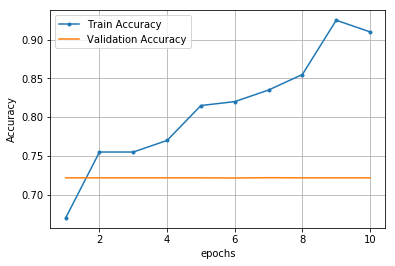

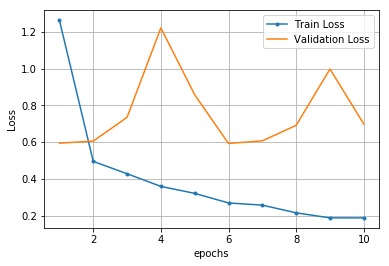

In [76]:
plotting_keras_acc(hist)